PURPOSE OF THIS NOTEBOOK:  
This notebook focuses on data exploration and analysis. We study the different fields of the data set present in raw data and choose the primary metrics of evaluation.

In [1]:
print("Fake Job Classifier - Notebook 1 Ready")

Fake Job Classifier - Notebook 1 Ready


In [2]:
import pandas as pd
df=pd.read_csv("../data/raw/fake_job_postings.csv")
df.head() #Checks first few rows


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [4]:
# CHECKING FOR MISSING VALUES
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [5]:
#CHECKING IF DATA SET IS BALANCED OR NOT
df['fraudulent'].value_counts()
df['fraudulent'].value_counts(normalize=True)*100

fraudulent
0    95.1566
1     4.8434
Name: proportion, dtype: float64

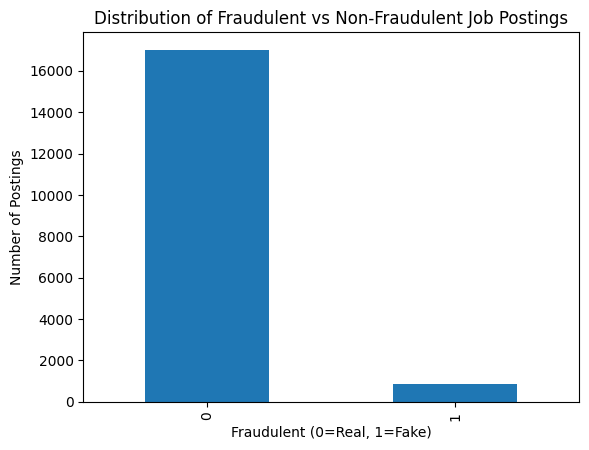

In [6]:
import matplotlib.pyplot as plt
df['fraudulent'].value_counts().plot(kind='bar')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Job Postings')
plt.xlabel('Fraudulent (0=Real, 1=Fake)')
plt.ylabel('Number of Postings')
plt.show()

The dataset is highly imbalanced with only ~4.8% fraudlent job postings. Such imbalance can cause models to favor the majority class, consequently making the fraud detection less. Therefore, evaluation metrics like recall, precision and F1 scores are more important for this task.

```
                |   PREDICTED REAL(0)    |    PREDICTED FRAUD(1)
----------------|------------------------|-------------------------
ACTUAL REAL(0)  |   True Negative(TN)    |   Flase Postive(FP)
----------------|------------------------|-------------------------
ACTUAL FRAUD(1) |   False Negative(FN)   |   True Positive(TP)

```

- FN is more dangerous than FP
METRICS OF EVALUATION
    * Accuracy = (TP + TN)/(TP + TN + FP + FN) [How many predictions were correct(lies in imbalanced data)]
    * Precision = (TP)/(TP+FP )  [When the model says 'fraud', how many actually our fraud]
    * Recall = (TP)/(TP + FN) [Of all fraud jobs, how many did it catch]
    * F1 Score = 2 * {(Precision * Recall)/(Precision + Recall)} [Harmonic mean of precision and recall]
    * Specifity =  TN / (TN + FP) [Measures how well real jobs are identified]

Hence, for us, the primary metrics of evaluation are:
- F1 Score
- Recall
- Precision